# Machine Learning Online Class - Exercise 1: Linear Regression
Instructions
------------
This file contains code that helps you get started on the
linear exercise. You will need to complete the following functions 
in this exericse:

1. warmUpExercise
2. plotData
3. gradientDescent
4. computeCost
5. gradientDescentMulti
6. computeCostMulti
7. featureNormalize
8. normalEqn


* refers to the population size in 10,000s
* refers to the profit in $10,000s

In [256]:
## Some administrative stuff
%pylab --no-import-all
%matplotlib inline
plt.style.use(['dark_background'])
plt.rcParams['figure.figsize'] = (5.,5.)   # figure size in inches
# plt.rcParams['text.color'] = 'C0'
# plt.rcParams['axes.labelcolor'] = 'C0'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['axes.labelcolor'] = 'C0'
# plt.rcParams['axes.edgecolor'] = 'C0'
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
# plt.rcParams['xtick.color'] = 'C0'
# plt.rcParams['ytick.color'] = 'C0'
plt.rcParams['text.usetex'] = True


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


## Part 1. Basic Function
Complete `warmUpExcercise()`

In [266]:
def warmUpExercise():
  """WARMUPEXERCISE Example function in octave
    
    A = WARMUPEXERCISE() is an example function that returns the 5x5 identity matrix
  """

  A = np.zeros((5,5))
  # ============= YOUR CODE HERE ==============
  # Instructions: Return the 5x5 identity matrix 
  #               In octave, we return values by defining which variables
  #               represent the return values (at the top of the file)
  #               and then set them accordingly. 
  for idx in xrange(A.shape[0]):
    A[idx,idx] = 1
  # ============= END CODE HERE ==============
  return A

In [267]:
print('Running warmUpExercise ...')
print('5x5 Identity Matrix:')
print warmUpExercise()

Running warmUpExercise ...
5x5 Identity Matrix:
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


## Part 2. Plotting
Complete `plotData()`

In [268]:
def plotData(x, y):
  """PLOTDATA Plots the data points x and y into a new figure 
  
     PLOTDATA(x,y) plots the data points and gives the figure axes labels of
     population and profit.
  """
  
  # plt.figure() % open a new figure window
  fig, ax = plt.subplots(1)

  # ====================== YOUR CODE HERE ======================
  # Instructions: Plot the training data into a figure using the 
  #               "figure" and "plot" commands. Set the axes labels using
  #               the "xlabel" and "ylabel" commands. Assume the 
  #               population and revenue data have been passed in
  #               as the x and y arguments of this function.
  #
  # Hint: You can use the 'rx' option with plot to have the markers
  #       appear as red crosses. Furthermore, you can make the
  #       markers larger by using plot(..., 'rx', MarkerSize = 10);
  #
  pl = ax.plot(x, y, 'x', MarkerSize=12)
  # ======================= END CODE HERE ======================
  return ax, pl

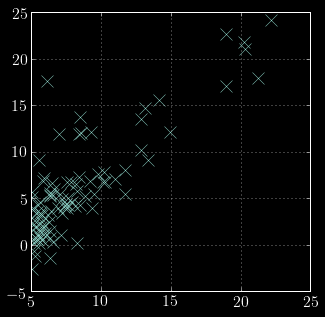

In [269]:
data = np.genfromtxt('ex1data1.txt', delimiter = ',')
# data = pd.read_csv('ex1data1.txt', delimiter = ',', header = None, names = ['X', 'y'])
X = data[:,[0]]
y = data[:,[1]]
m = len(y) # number of training examples

# Plot Data
# Note: You have to complete the code in `plotData()`
ax, pl = plotData(X, y)
ax.grid()

## Part 3: Gradient descent
Implement `computeCost()`, `gradientDescent()`

In [305]:
def computeCost(X, y, theta):
  """COMPUTECOST Compute cost for linear regression

  J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
  parameter for linear regression to fit the data points in X and y
  """

  # Initialize some useful values
  m = len(y) # Number of training examples

  # You need to return the following variables correctly
  J = 0

  # ====================== YOUR CODE HERE ======================
  # Instructions: Compute the cost of a particular choice of theta
  #               You should set J to the cost.
  J = np.sum((np.dot(X, theta) - y)**2) / 2. / m
  # ============================================================
  return J

def gradientDescent(X, y, theta, alpha, num_iters):
  """GRADIENTDESCENT Performs gradient descent to learn theta
    
    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
  """

  # Initialize some useful values
  m = len(y) # number of training examples
  J_history = np.zeros((num_iters, 1))

  for iter in xrange(num_iters):
    # ====================== YOUR CODE HERE ======================
    # Instructions: Perform a single gradient step on the parameter vector
    #               theta. 
    #
    # Hint: While debugging, it can be useful to print out the values
    #       of the cost function (computeCost) and gradient here.
    #
    d = alpha / m * np.sum((np.dot(X, theta) - y)*X, axis=0)[:,np.newaxis]
    theta -= d 
    #  theta[0], theta[1] = theta[0] - alpha / m * np.sum((np.dot(X, theta) - y)*X[0]), theta[1] - alpha / m * np.sum((np.dot(X, theta) - y)*X[1])

    # ============================================================

    # Save the cost J in every iteration    
    J_history[iter] = computeCost(X, y, theta);
      
  return theta, J_history


Running Gradient Descent ...
Theta found by gradient descent:  -3.630291 1.166362
For population = 35,000, we predict a profit of 4519.77
For population = 70,000, we predict a profit of 45342.45


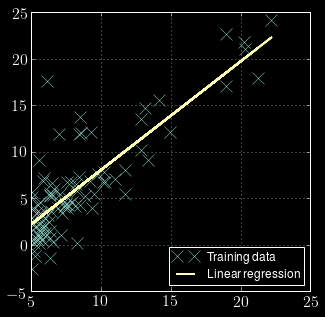

In [307]:
print('Running Gradient Descent ...')
X = np.concatenate([np.ones((m, 1)), data[:,[0]]], axis=1) # Add a column of ones to x
theta = np.zeros((2, 1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# compute and display initial cost
computeCost(X, y, theta)

# run gradient descent
theta, _ = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent: '),
print('%f %f'%(theta[0], theta[1]))

# Plot the linear fit
ax, pl0 = plotData(X[:,1], y)
pl1 = ax.plot(X[:,1], np.dot(X, theta), '-')
ax.legend(['Training data', 'Linear regression'], loc='lower right')
ax.grid()

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of %.2f'%(predict1*10000))
predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of %.2f'%(predict2*10000))

## Part 4. Visualizing $J(\theta_0, \theta_1)$

Visualizing J(theta_0, theta_1) ...


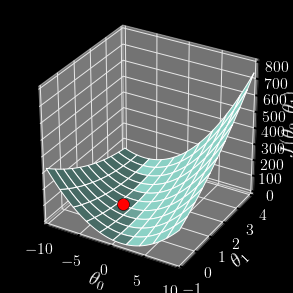

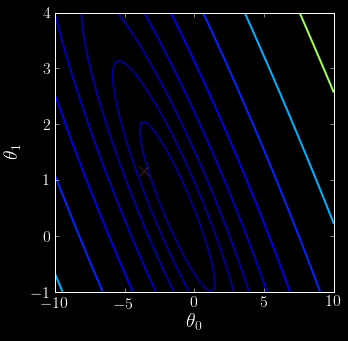

In [310]:
from mpl_toolkits.mplot3d import Axes3D
print('Visualizing J(theta_0, theta_1) ...')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in xrange(len(theta0_vals)):
  for j in xrange(len(theta1_vals)):
    t = [[theta0_vals[i]], [theta1_vals[j]]]
    J_vals[i,j] = computeCost(X, y, t);


# Because of the way meshgrids work in the surf command, we need to 
# transpose J_vals before calling surf, or else the axes will be flipped
# J_vals = J_vals.T
# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta_0, \\theta_1)$')
ax.plot(theta[0], theta[1], 'ro', MarkerSize= 12, LineWidth=2)
# ax.set_axis_off()

# # Contour plot
# fig = plt.figure()
# # Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
# plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
# plt.xlabel('$\\theta_0$')
# plt.ylabel('$\\theta_1$');
# plt.plot(theta[0], theta[1], 'rx', MarkerSize= 10, LineWidth=2)